<a href="https://colab.research.google.com/github/larregui/BigDataAnalytics/blob/main/IST718_FinalProject_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Out of This World
# Author: Laura & Tiffannie
# Purpose: Final Project for IST 718 Big Data Analytics
# Professor: Jon Fox


## Resources  
https://www.kaggle.com/rkd286/ufo-sightings-eda

### Import Libraries



In [1]:
import pandas as pd #data frame operations
import numpy as np #arrays and math functions
from scipy.stats import uniform #for training and test splits
import statsmodels.api as sm  # statistical models (including regression)
import statsmodels.formula.api as smf  # R-like model specification
import matplotlib.pyplot as plt #2D plotting
import seaborn as sns #seaborn for plotting
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Import Dataset and Cleanup

In [5]:
# read in UFO data
ufo = pd.read_csv("/content/ufo.csv")
# shape and data types of the data
print("What are the dimensions of the dataset?\n",ufo.shape)
print("What are the datatypes for each variable?\n",ufo.dtypes)
# compute descriptive statistics 
print("Descriptive Statistics\n",ufo.describe())
# % of missing.
for col in ufo.columns:
    pct_missing = np.mean(ufo[col].isnull())
    print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

What are the dimensions of the dataset?
 (80332, 11)
What are the datatypes for each variable?
 datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object
Descriptive Statistics
          longitude 
count  80332.000000
mean     -86.772885
std       39.697205
min     -176.658056
25%     -112.073333
50%      -87.903611
75%      -78.755000
max      178.441900
Are there any null values?
 datetime - 0.0%
Are there any null values?
 city - 0.0%
Are there any null values?
 state - 7.0%
Are there any null values?
 country - 12.0%
Are there any null values?
 shape - 2.0%
Are there any null values?
 duration (seconds) - 0.0%
Are there any null values?
 duration (hours/min) - 0.0%
Are there any 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,9) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
# read in Movie data
mov = pd.read_csv("alien_movies.csv")
# shape and data types of the data
print("What are the dimensions of the dataset?\n",mov.shape)
print("What are the datatypes for each variable?\n",mov.dtypes)
mov = mov.drop([ 'Unnamed: 2', 'Unnamed: 3'], axis=1)
# % of missing.
for col in mov.columns:
    pct_missing = np.mean(mov[col].isnull())
    print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

What are the dimensions of the dataset?
 (580, 4)
What are the datatypes for each variable?
 Title          object
Year            int64
Unnamed: 2    float64
Unnamed: 3    float64
dtype: object
Are there any null values?
 Title - 0.0%
Are there any null values?
 Year - 0.0%


In [ ]:
# read in Movie data
air = pd.read_csv("us-airports.csv")
# shape and data types of the data
print("What are the dimensions of the dataset?\n",air.shape)
print("What are the datatypes for each variable?\n",air.dtypes)
air = air.drop([ 'last_updated', 'wikipedia_link', 'home_link','gps_code','continent', 
                'keywords','iata_code', 'local_code', 'iso_country','iso_region', 'country_name', 'score'], axis=1)
# % of missing.
for col in air.columns:
    pct_missing = np.mean(air[col].isnull())
    print("Are there any null values?\n",'{} - {}%'.format(col, round(pct_missing*100)))

What are the dimensions of the dataset?
 (23705, 23)
What are the datatypes for each variable?
 id                     int64
ident                 object
type                  object
name                  object
latitude_deg         float64
longitude_deg        float64
elevation_ft         float64
continent             object
country_name          object
iso_country           object
region_name           object
iso_region            object
local_region          object
municipality          object
scheduled_service      int64
gps_code              object
iata_code             object
local_code            object
home_link             object
wikipedia_link        object
keywords              object
score                  int64
last_updated          object
dtype: object
Are there any null values?
 id - 0.0%
Are there any null values?
 ident - 0.0%
Are there any null values?
 type - 0.0%
Are there any null values?
 name - 0.0%
Are there any null values?
 latitude_deg - 0.0%
Are there any nu

The dataset has 11 variables and 80,332 records. 
The following columns have missing values:


*   state - 7%
*   Country - 12%
*   Shape - 2%



In [6]:
#change attributes data type as needed
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce')
ufo.insert(1, 'year', ufo['datetime'].dt.year)
ufo['year'] = ufo['year'].fillna(0).astype(int)

#print(ufo.country.unique())
#print(len(ufo.country),"Contries")
# The datase includes records from US, GB, CA, AU, and DE.
# Should we study one country?
nufo = ufo[ufo.country == 'us']

us_states = np.asarray(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
                        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
                        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
                        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
                        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

### Data Visualizations

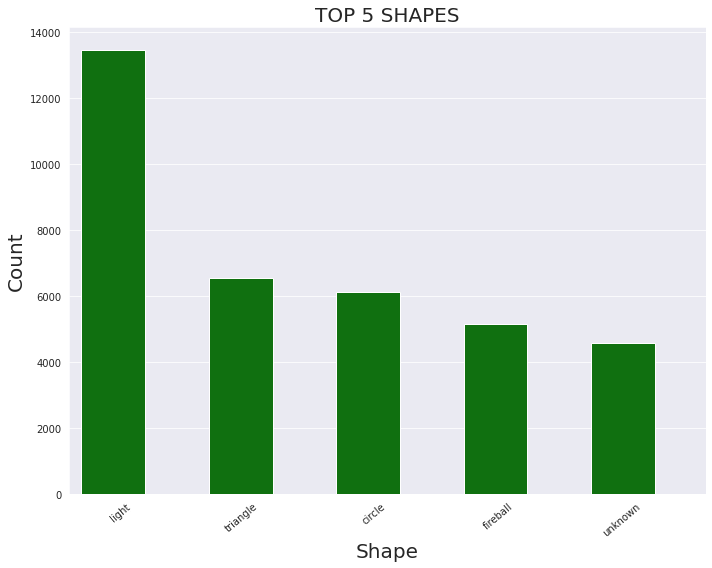

In [ ]:
# Barplot - UFO Shapes
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax = sns.barplot(x =nufo['shape'].value_counts().head().index, y = nufo['shape'].value_counts().head().values, color = 'green')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xlabel('Shape').set_size(20)
ax.set_ylabel('Count').set_size(20)
ax.set_title('TOP 5 SHAPES').set_size(20)
plt.tight_layout()
for p in ax.patches:
        p.set_width(0.5)

In [ ]:
hours_high = nufo['datetime'].dt.hour.value_counts()
years_high = nufo['datetime'].dt.year.value_counts().head()
month_high = nufo['datetime'].dt.month.value_counts()
def top_years(year):
    if year in years_high.index:
        return year
hour_vs_year = nufo.pivot_table(columns=nufo['datetime'].dt.hour,index=nufo['datetime'].dt.year.apply(top_years),aggfunc='count',values='city')
hour_vs_year.columns = hour_vs_year.columns.astype(int)
hour_vs_year.columns = hour_vs_year.columns.astype(str) + ":00"
hour_vs_year.index = hour_vs_year.index.astype(int)

month_vs_year = nufo.pivot_table(columns=nufo['datetime'].dt.month,index=nufo['datetime'].dt.year.apply(top_years),aggfunc='count',values='city')
month_vs_year.columns = month_vs_year.columns.astype(int)


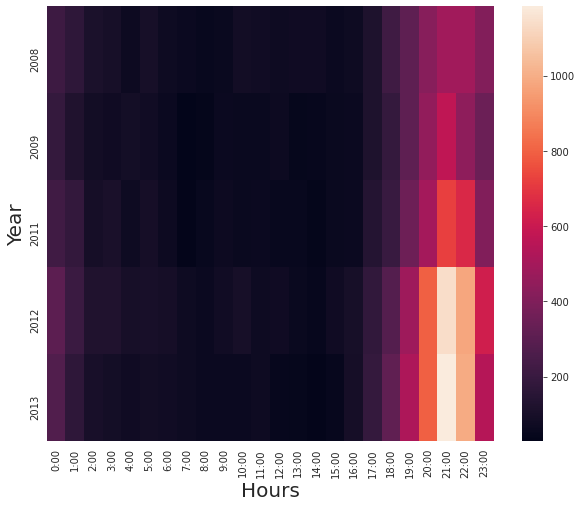

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(hour_vs_year)
ax.set_xlabel('Hours').set_size(20)
ax.set_ylabel('Year').set_size(20)

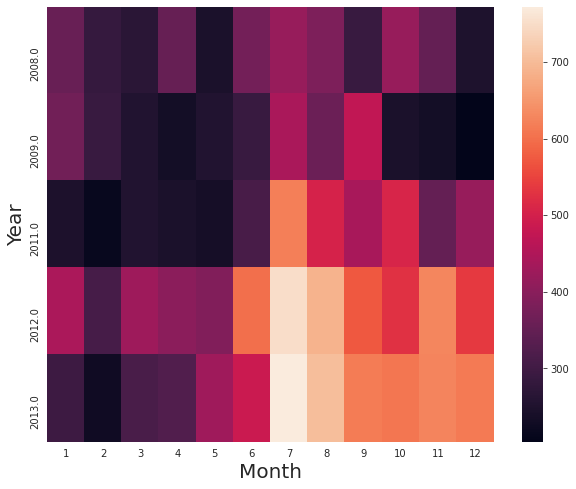

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(month_vs_year)
ax.set_xlabel('Month').set_size(20)
ax.set_ylabel('Year').set_size(20)

In [ ]:
# UFO sightings per state
ufo_perstate = np.asarray(nufo.groupby('state').state.count())

ufo_scale = [[0, 'rgb(229, 249, 239)'], [1, 'rgb(0, 163, 81)']]

data = [dict(
        type = 'choropleth',
        autocolorscale = False,
        colorscale = ufo_scale,
        showscale = False,
        locations = us_states,
        locationmode = 'USA-states',
        z = ufo_perstate,
        marker = dict(
            line = dict(
                color = 'rgb(255, 255, 255)',
                width = 2)
            )
        )]

layout = dict(
         title = 'UFO Reports by State in United States',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             countrycolor = 'rgb(255, 255, 255)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
        )

figure = dict(data = data, layout = layout)
iplot(figure)

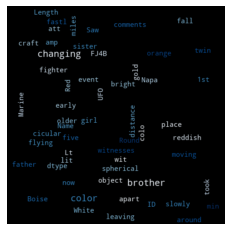

In [10]:
#wordcloud

cols2drop=['datetime', 'city', 'state', 'country','shape','duration (seconds)', 'duration (hours/min)', 'date posted',
       'latitude', 'longitude ']
w_nufo=nufo.drop(columns=cols2drop)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
comment_strng = str(w_nufo.comments)
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, colormap="Blues").generate(comment_strng)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()


### Build a training and testing dataframes

In [14]:
np.random.seed(1234)
nufo['runiform'] = uniform.rvs(loc = 0, scale = 1, size = len(nufo))
train = nufo[nufo['runiform'] >= 0.33]
test = nufo[nufo['runiform'] < 0.33]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Initial data analysis


### Models


### Random Forest  

#### Association Rule Mining

In [15]:
nufo.columns
cols2drop=['duration (seconds)', 'duration (hours/min)', 'comments', 'date posted',
       'latitude', 'longitude ', 'runiform']
arm_nufo=nufo.drop(columns=cols2drop)

In [16]:
from mlxtend.frequent_patterns import apriori, association_rules 
#nufo.columns
cols2drop=['duration (seconds)', 'duration (hours/min)', 'comments', 'date posted',
       'latitude', 'longitude ', 'runiform']
arm_nufo=nufo.drop(columns=cols2drop)
# Sightings done in California 
basket_CA = (arm_nufo[arm_nufo['state'] =="CA"]) 
# Defining the hot encoding function to make the data suitable  
# for the concerned libraries 
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1
  
# Encoding the datasets 
basket_encoded = basket_CA.applymap(hot_encode) 
basket_CA = basket_encoded 



In [17]:
# Building the model 
frq_items = apriori(basket_CA, min_support = 0.05, use_colnames = True) 
  
# Collecting the inferred rules in a dataframe 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

ZeroDivisionError: ignored

### Questions